In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('NetflixOriginals.csv')

Let's transform column "Premiere" into more convinient for us format

In [4]:
def ToDate(x):
    if "," in x: 
        return datetime.strptime(x, '%B %d, %Y')
    else:
        return datetime.strptime(x, '%B %d. %Y')

In [5]:
list_date = []
list_date = data["Premiere"].apply(lambda x: ToDate(x)).to_list()
data["Date"] = list_date
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08


# Analisys

### The General trends

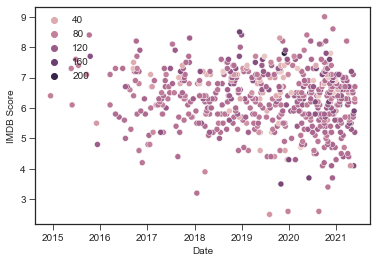

In [6]:
plt.style.use("seaborn-ticks")
sns.scatterplot(data = data, x='Date', y='IMDB Score', hue = "Runtime")
plt.legend(loc='upper left')

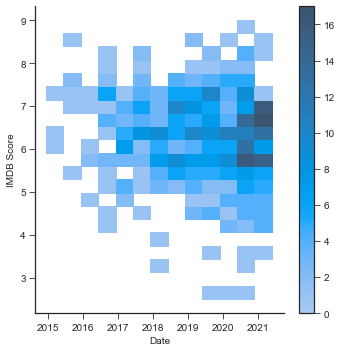

In [7]:
plt.style.use("tableau-colorblind10")
sns.displot(data = data, x="Date", y='IMDB Score',cbar=True)

In [8]:
l_data = data[(data["IMDB Score"]) < 6]
m_data = data[(data["IMDB Score"]) > 6]
print("IMDB Score < 6:", round(l_data["Runtime"].std(), 1))
print("IMDB Score > 6:", round(m_data["Runtime"].std(), 1))

IMDB Score < 6: 22.1
IMDB Score > 6: 30.8


The first graph represents the correlation between date, IMDB score and runtime. From the graph it is clear that over time the number of films dramatically increased as well as their variability. This might be the result of the growth in amount of film production.

The second scatter plot shows Date, IMDB score and the number of films. It depicts the same data as the first chart. However, it evidently demonstrates that starting from year 2017 more films have received high IMDB scores. This fact also follows from the increase in the number of produced films.

In addition, I have calculated the standard deviation. From this we can conclude that films with longer runtime have higher rankings as opposed to sorter films.

### Genres

In [9]:
data['Genre'].value_counts().to_frame().head(10)

,Genre
Documentary,159
Drama,77
Comedy,49
Romantic comedy,39
Thriller,33
Comedy-drama,14
Crime drama,11
Horror,9
Biopic,9
Action,7


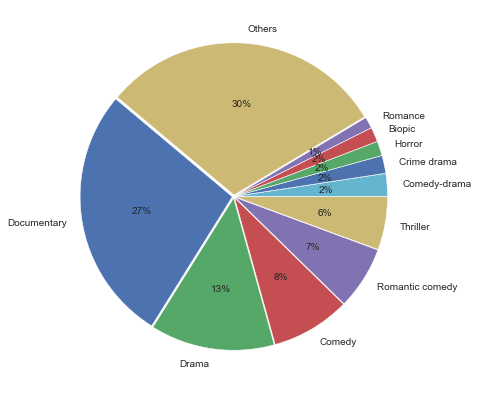

In [17]:
plt.style.use("seaborn")
pie_graph = plt.figure(figsize = (7,7))
rest_gen = sum(data['Genre'].value_counts().to_list()) - sum(data['Genre'].value_counts().head(10).to_list())
dat = data['Genre'].value_counts().head(10).to_list()
dat.append(rest_gen)
labels = ["Documentary","Drama","Comedy","Romantic comedy","Thriller", "Comedy-drama", "Crime drama", "Horror", "Biopic", "Romance", "Others"]
wp = { 'linewidth' : 0.5, 'edgecolor' : "white" }
plt.pie(dat, labels = labels, explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01), startangle=140, shadow = False,  wedgeprops = wp, autopct='%1.0f%%')
plt.show()

In [11]:
doc_data = data[(data.Genre == "Documentary")]
dr_data = data[(data.Genre == "Drama")]
com_data = data[(data.Genre == "Comedy")]
print("Documentary:", doc_data["IMDB Score"].median())
print("Drama:", dr_data["IMDB Score"].median())
print("Comedy:", com_data["IMDB Score"].median())

Documentary: 7.0
Drama: 6.4
Comedy: 5.5


Genre
Comedy    AxesSubplot(0.125,0.125;0.775x0.755)
Name: IMDB Score, dtype: object

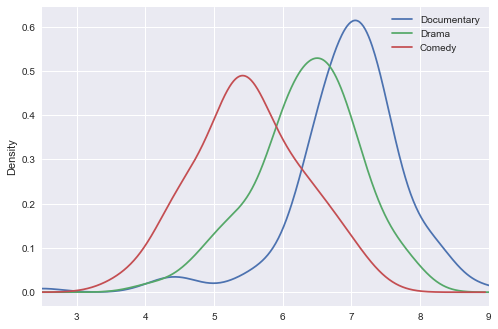

In [18]:
plt.style.use("seaborn")
doc_data = data[(data.Genre == "Documentary")]
dr_data = data[(data.Genre == "Drama")]
c_data = data[(data.Genre == "Comedy")]
doc_data.groupby("Genre")["IMDB Score"].plot(kind='kde', legend = True, xlim=(2.5,9))
dr_data.groupby("Genre")["IMDB Score"].plot(kind='kde', legend = True, xlim=(2.5,9))
c_data.groupby("Genre")["IMDB Score"].plot(kind='kde', legend = True, xlim=(2.5,9))

The pie chart analizes films considering genres. At the beginning I wanted to determine the most popular genres. I find it intriguing, that there are a lot of "Documentary" films on Netflix. The second and the third most popular genres are “Drama” and “Comedy” respectively. The diagram shows that the proportions of all the other genres are less than 10%.

Next, I took 3 the most popular genres and I compared them comparing the IMDB Score. The results are very fascinating. The line graph shows that the best films (if we rely on IMDB Score) on Netflix are documentary: a lot of films with the score > 7, the density of 7-score films is more than 0.6. The second place took drama films: the mean is less, and it is easy to notice, that there are drama films with score 5 more than documentary worth the same score. The weakest genre is Comedy. As we can see, the most films have scores less, than 6 and the most popular score is about 5.5.

### Languages

In [13]:
data['Language'].value_counts().head(10).to_frame()

,Language
English,401
Hindi,33
Spanish,31
French,20
Italian,14
Portuguese,12
Indonesian,9
Korean,6
Japanese,6
German,5


In [14]:
eng_runtime = data[(data.Language == "English")]
sp_runtime = data[(data.Language == "Spanish")]
h_runtime = data[(data.Language == "Hindi")]
print("English:", round(eng_runtime.Runtime.mean(), 2))
print("Spanish:", round(sp_runtime.Runtime.mean(), 2))
print("Hindi:", round(h_runtime.Runtime.mean(), 2))

English: 91.82
Spanish: 93.39
Hindi: 115.79


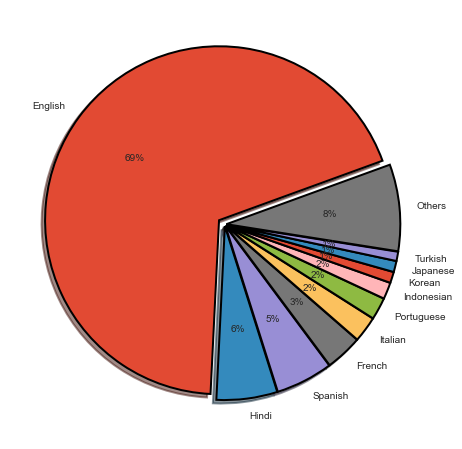

In [15]:
plt.style.use("ggplot")
pie_graph = plt.figure(figsize = (8,8))
rest_lan = sum(data['Language'].value_counts().to_list()) - sum(data['Language'].value_counts().head(10).to_list())
dat = data['Language'].value_counts().head(10).to_list()
dat.append(rest_lan)
labels = ["English","Hindi","Spanish","French","Italian", "Portuguese", "Indonesian", "Korean", "Japanese", "Turkish","Others"]
wp = { 'linewidth' : 2, 'edgecolor' : "black" }
plt.pie(dat, labels = labels, explode = (0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01), startangle=20, shadow = True,  wedgeprops = wp, autopct='%1.0f%%')
plt.show()

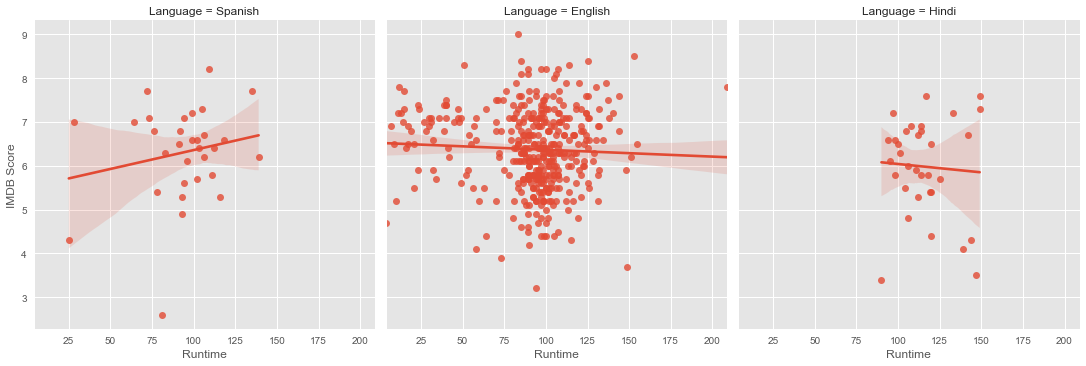

In [16]:
lan_data = data[(data.Language == "English") | (data.Language == "Hindi") | (data.Language == "Spanish")]
sns.lmplot(data = lan_data, x = "Runtime", y = "IMDB Score", col = "Language")

In the pie cart, looking at languages, I noticed that 69% of all films are made entirely in English. 5% and 6% of films are in Spanish and Hindi respectively. There are 8% of films in other languages.
The mean runtime of Hindi films is generally longer than of other films, being 115,78 minutes as opposed to 91 and 93 minutes of English and Spanish films correspondingly.
The last scatter plot shows the correlation between runtime and IMBD score. With films in English, we can see a slight tendency of longer films having lower IMDB score. Same applies to Hindi films. In contrast, Spanish films have the opposite tendency – with the increase in runtime increases the score. Moreover, there are no Hindi films longer than 150 minutes, while some English films last up to 220 minutes. ˜The runtime of Spanish films spreads from 25 to 135 minutes.